In [27]:
%cd D:/yukong/survid
# preamble
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# look, whether everything is still alive
stream = os.popen('ssh pamir "ps -fA | grep python"')
output = stream.readlines()
for str in output:
    print(str.strip())

suffixes = ['tmp']
descr = ['base']
nfiles = len(suffixes)
#names = ['./logs/Cross/log-' + s + '.txt' for s in suffixes]
names = ['./logs/Cross/val_log.txt' ]

# default colors from T10-palette
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# load data
data = [None] * nfiles
for i in range(nfiles):
    data[i] = np.loadtxt(names[i], comments='#', delimiter=' ', usecols = (1,3,5,7,9,11))

# common plot parameters
plt.rcParams.update({'font.size': 16})
# maxx = 5000
maxx = -1 # means no limit


D:\yukong\survid


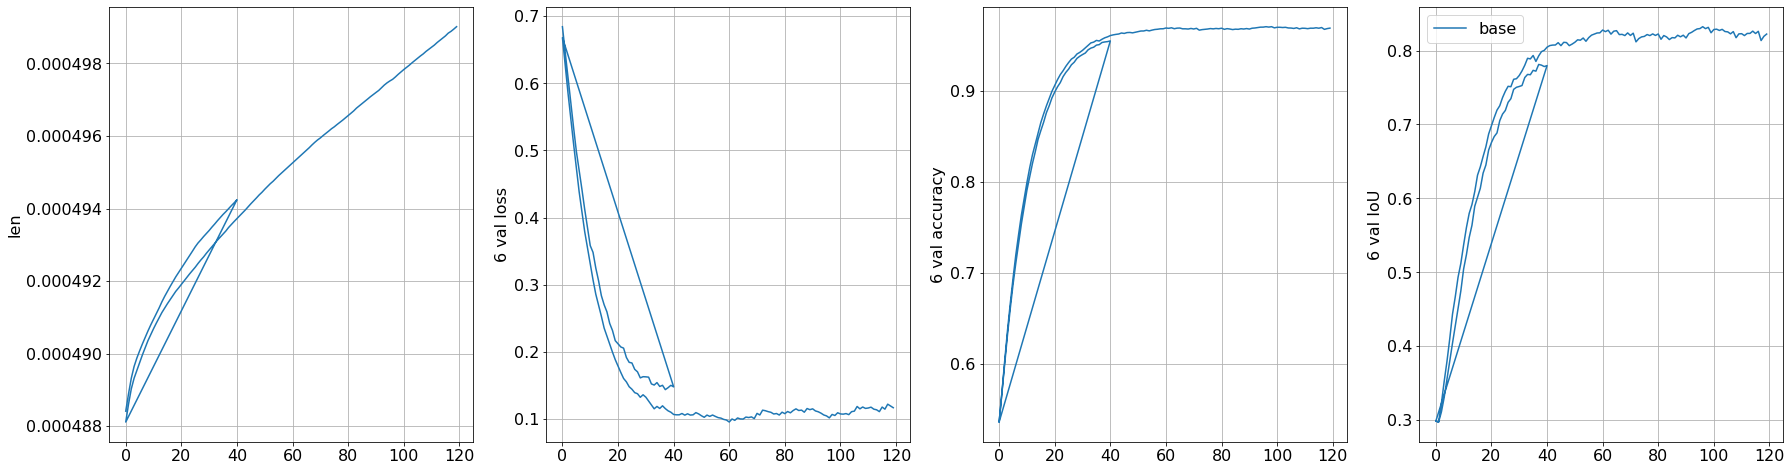

In [28]:
plt.rcParams["figure.figsize"] = (30,8)
fig, ax = plt.subplots(1, 4)

for i in range(nfiles):
    ax[0].plot(data[i][:,1],data[i][:,2], color=colors[i]);
ax[0].set_ylabel('len');
ax[0].grid(True);
if maxx>0: ax[0].set_xlim((0, maxx));

for i in range(nfiles):
    ax[1].plot(data[i][:,1],data[i][:,3], color=colors[i]);
if names == ['./logs/Cross/log-' + s + '.txt' for s in suffixes]:
    ax[1].set_ylabel('6 train loss');
else:
    ax[1].set_ylabel('6 val loss');
ax[1].grid(True);
if maxx>0: ax[1].set_xlim((0, maxx));

for i in range(nfiles):
    ax[2].plot(data[i][:,1],data[i][:,4], color=colors[i]);
if names == ['./logs/Cross/log-' + s + '.txt' for s in suffixes]:
    ax[2].set_ylabel('6 train  accuracy');
else:
    ax[2].set_ylabel('6 val accuracy');
ax[2].grid(True);
if maxx>0: ax[2].set_xlim((0, maxx));

for i in range(nfiles):
    ax[3].plot(data[i][:,1],data[i][:,5], color=colors[i]);
if names == ['./logs/Cross/log-' + s + '.txt' for s in suffixes]:
    ax[3].set_ylabel('6 train  IoU');
else:
    ax[3].set_ylabel('6 val IoU');    
ax[3].grid(True);
if maxx>0: ax[3].set_xlim((0, maxx));

ax[3].legend(descr);


In [13]:
# times

for i in range(nfiles):
    num = data[i].size//6
    last_time = data[i][num-1,0]
    last_it = data[i][num-1,1]
    speed = last_it/last_time
    print(descr[i], '(it/sec):' , speed, '\t', last_it, 'iterations')


base (it/sec): 0.002290979089602108 	 500.0 iterations
